<a href="https://colab.research.google.com/github/Nikhileswar-Komati/Machine_Learning/blob/master/COVID/Copy_of_Covid_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
files.upload()

In [3]:
data = pd.read_excel('/content/MHcovid.xlsx')
data['day'] = data.index
data.sample(5)

,MH,day
311,192,311
786,4930,786
483,14492,483
558,23365,558
564,21656,564


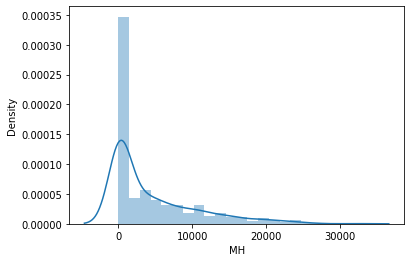

In [48]:
import seaborn as sns
sns.distplot(data['MH'])

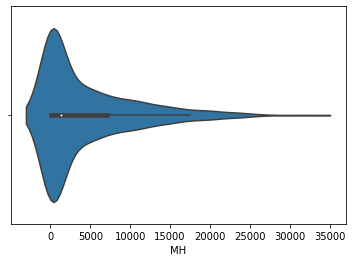

In [49]:
sns.violinplot(data['MH'])

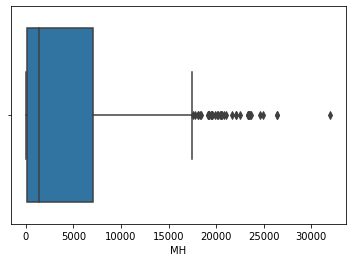

In [50]:
sns.boxplot(data['MH'])

In [7]:
data.describe()

,MH,day
count,846.000000,846.000000
mean,4400.939716,422.500000
std,5899.042243,244.363459
min,-5914.000000,0.000000
25%,122.000000,211.250000
50%,1281.500000,422.500000
75%,7048.750000,633.750000
max,32007.000000,845.000000


In [8]:
sorted(data['MH'].values)[:10]

[-5914, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [15]:
data.loc[data['MH'] == -5914, ['MH', 'day']]
data.loc[data['day'] == 831, ['MH']] = 5914
data.loc[data['MH'] == 5914, ['MH', 'day']]

,MH,day
831,5914,831


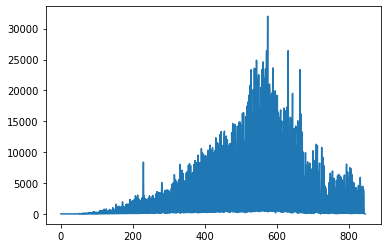

In [16]:
import matplotlib.pyplot as plt
plt.plot(data['MH'])
plt.show()

Linear Regression


In [74]:
import xgboost as xgb
alg = xgb.XGBRegressor(learning_rate = 0.03, n_estimators = 100, reg_lambda = 10, gamma=0, max_depth=3)

In [75]:

y = data.iloc[:, 0].values
X = data.iloc[:, 1:].values

from sklearn import metrics, model_selection
alg.fit(X, y)
train_predictions = alg.predict(X)

cv_score = model_selection.cross_val_score(alg, X, y, cv = 30, scoring = 'neg_mean_squared_error')
cv_score = np.sqrt(np.abs(cv_score))

print("Model Report")
print("RMSE On Train", np.sqrt(np.abs(metrics.mean_squared_error(train_predictions, y))))
print("CV Score - Mean {} | Standard Deviation {} | Min {} | Max {}".format(np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))



[16:06:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

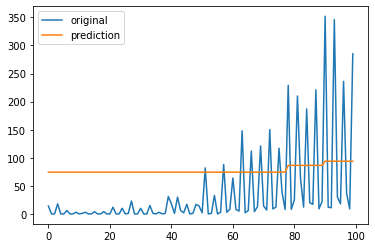

In [76]:
import matplotlib.pyplot as plt
plt.plot(X[:100], y[:100], label = 'original')
plt.plot(X[:100], train_predictions[:100], label = 'prediction')
plt.legend()
plt.show()

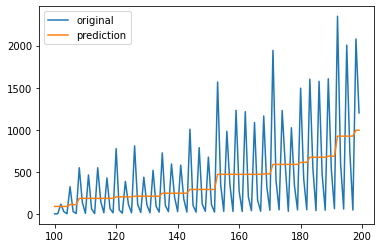

In [77]:
import matplotlib.pyplot as plt
plt.plot(X[100:200], y[100:200], label = 'original')
plt.plot(X[100:200], train_predictions[100:200], label = 'prediction')
plt.legend()
plt.show()

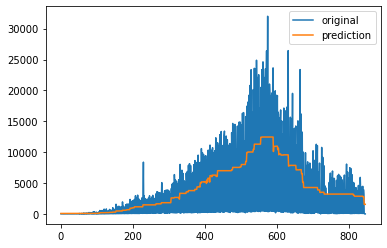

In [78]:
import matplotlib.pyplot as plt
plt.plot(X, y, label = 'original')
plt.plot(X, train_predictions, label = 'prediction')
plt.legend()
plt.show()

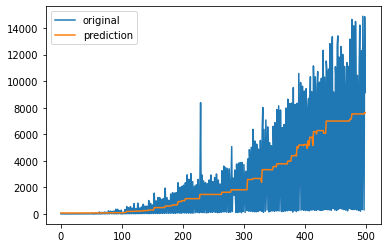

In [79]:
import matplotlib.pyplot as plt
plt.plot(X[:500], y[:500], label = 'original')
plt.plot(X[:500], train_predictions[:500], label = 'prediction')
plt.legend()
plt.show()

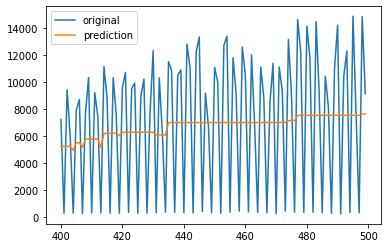

In [80]:
import matplotlib.pyplot as plt
plt.plot(X[400:500], y[400:500], label = 'original')
plt.plot(X[400:500], train_predictions[400:500], label = 'prediction')
plt.legend()
plt.show()